# Linear regression

Regressão linear tenta modelar a relação entre duas variáveis

- Enquanto $x$ aumenta, $y$ também aumenta com uma relação $c$
- Enquanto $x$ aumenta, $y$ diminui com uma relação $c$
- a correlação é uma outra forma de medir o quão duas estão correlacionadas, porém medindo a força de associação, enquanto a regressão quantifica a naturerza do relacionamento

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Dataset description
 - Features
    - CRIM - per capita crime rate by town
    - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS - proportion of non-retail business acres per town.
    - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    - NOX - nitric oxides concentration (parts per 10 million)
    - RM - average number of rooms per dwelling
    - AGE - proportion of owner-occupied units built prior to 1940
    - DIS - weighted distances to five Boston employment centres
    - RAD - index of accessibility to radial highways
    - TAX - full-value property-tax rate per $10,000
    - PTRATIO - pupil-teacher ratio by town
    - B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT - % lower status of the population
- Target
    - MEDV - Median value of owner-occupied homes in $1000's


## Default and functions definitions

In [2]:
plt.rcParams['figure.figsize'] = (10, 8)
for spine in ['top', 'right']:
    plt.rcParams[f'axes.spines.{spine}'] = False

RANDOM_STATE = 42

In [3]:
def load_dataset():
    X, y = load_boston(return_X_y=True)

    return train_test_split(X, y, random_state=RANDOM_STATE)


def eval_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return rmse, mae, r2

## Dataset split

In [4]:
X_train, X_test, y_train, y_test = load_dataset()

columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
]
target = 'MEDV'
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

y_train = pd.DataFrame(y_train, columns=[target])
y_test = pd.DataFrame(y_test, columns=[target])

## Linear correlation viz

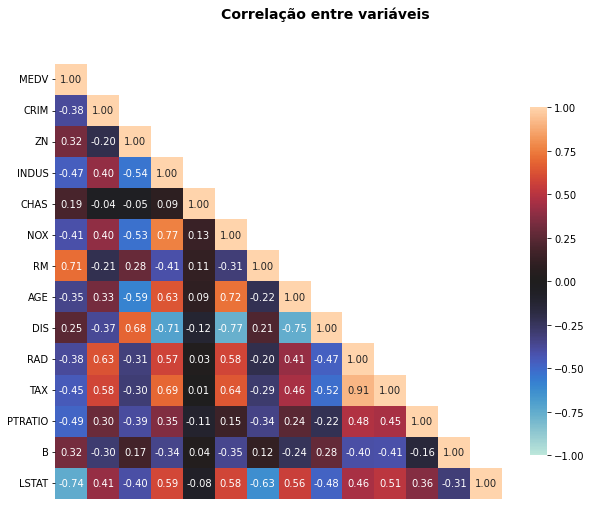

In [5]:
corr = pd.concat([y_train, X_train], axis=1).corr()
mask = np.triu(corr, k=1).astype(bool)
fig, ax = plt.subplots()
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, cbar_kws={'shrink': 0.8},
    ax=ax, annot=True, xticklabels=False, fmt='.2f')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
fig.suptitle("Correlação entre variáveis", fontweight='bold', fontsize=14);

## Simples linear regression

Comentamos que correlação linear também descreve uma relação linear entre duas variáveis.
Vamos testar essa relação utilizando uma regressão linear simples entre a variável com maior correlação (módulo) com a variável alvo: LSTAT

In [6]:
input_feature = 'LSTAT'
feat = X_train[[input_feature]]

slr = LinearRegression()
slr.fit(feat, y_train)
y_pred = slr.predict(X_test[[input_feature]])

(rmse, mae, r2) = eval_metrics(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 5.958891073367555
MAE: 4.5560507624182005
R2: 0.4929340114233606


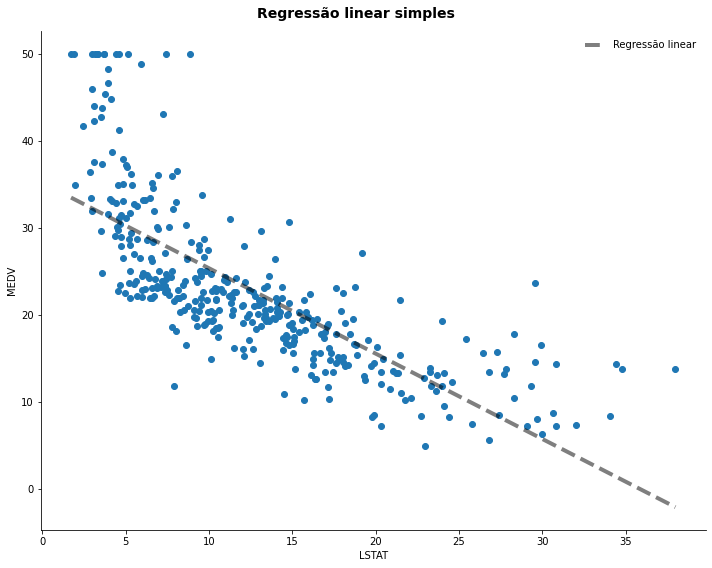

In [7]:
x = np.linspace(feat.min(), feat.max(), 100)
fig, ax = plt.subplots()
ax.plot(x, slr.predict(x), ls='--', c='k', lw=4, alpha=0.5, label='Regressão linear')
ax.scatter(x=feat, y=y_train)
ax.set_xlabel(input_feature)
ax.set_ylabel(target)
ax.legend(frameon=False)
plt.suptitle("Regressão linear simples", fontweight='bold', fontsize=14)
plt.tight_layout();

## Multiple linear regression

RMSE: 4.700924890603764
MAE: 3.0609395954370267
R2: 0.6844267283527128


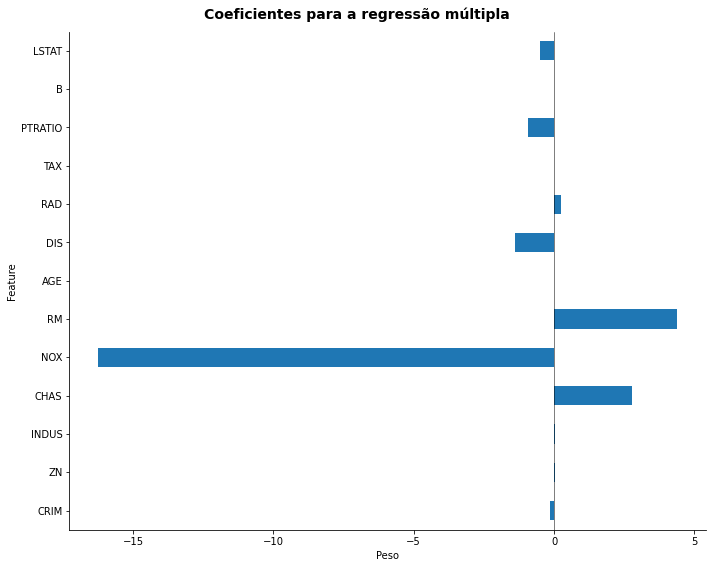

In [8]:
feat = X_train

mlr = LinearRegression(normalize=True)
mlr.fit(feat, y_train)
y_pred = mlr.predict(X_test)

(rmse, mae, r2) = eval_metrics(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

fig, ax = plt.subplots()
pd.DataFrame(mlr.coef_, columns=feat.columns).T.plot(kind='barh', ax=ax, legend=False)
ax.axvline(x=0, c='k', lw=0.5)
ax.set_xlabel("Peso")
ax.set_ylabel("Feature")
plt.suptitle("Coeficientes para a regressão múltipla", fontweight='bold', fontsize=14)
plt.tight_layout();